In [ ]:
# By running this code -- It will allow you to upload your image file to Colab (alternative way)
from google.colab import files
uploaded = files.upload()

Saving image44.jpg to image44 (2).jpg


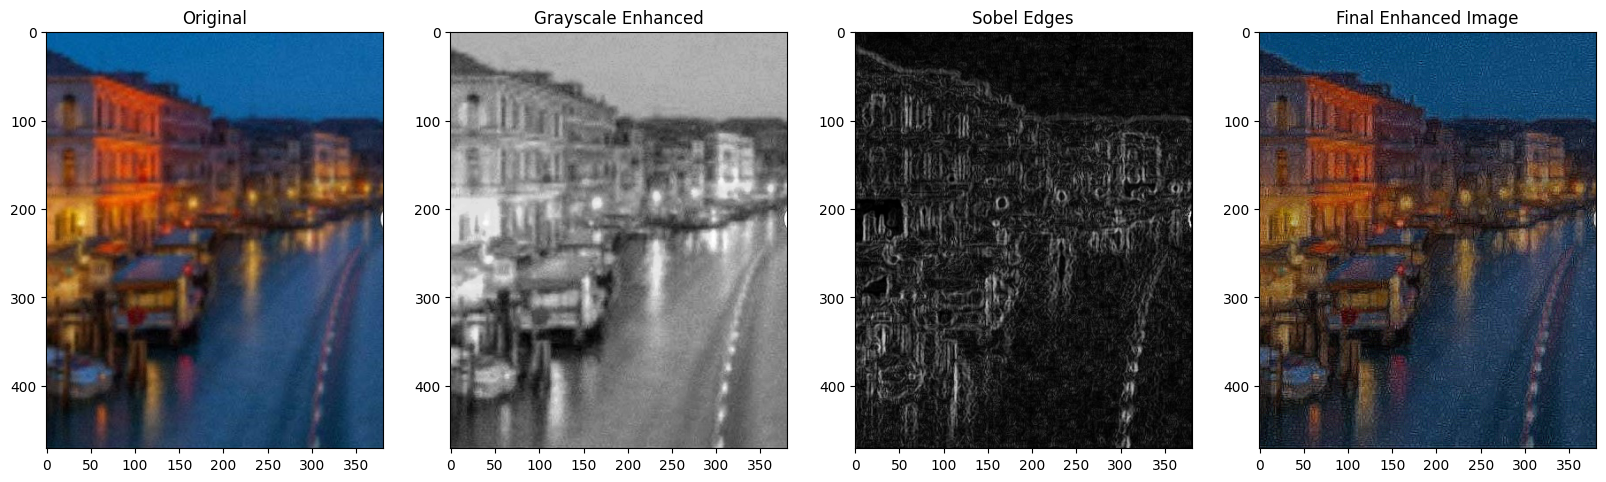

In [ ]:
from PIL import Image, ImageEnhance
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load an image using PIL for basic enhancements
image_path = "/content/image44.jpg"
image = Image.open(image_path)

# Enhance the brightness
brightness_factor = 2
brightness_enhancer = ImageEnhance.Brightness(image)
bright_image = brightness_enhancer.enhance(brightness_factor)

# Enhance the color saturation
color_factor = 2.0
color_enhancer = ImageEnhance.Color(bright_image)
color_image = color_enhancer.enhance(color_factor)

# Convert the enhanced image to grayscale using PIL and then to OpenCV format
gray_image = color_image.convert("L")
gray_image_cv = np.array(gray_image)

# Apply a Laplacian filter for edge detection
laplacian_kernel_size = 5
laplacian = cv2.Laplacian(gray_image_cv, cv2.CV_64F, ksize=laplacian_kernel_size)

# Sobel filters to detect x and y edges
sobel_x_kernel_size =3
sobel_y_kernel_size =3
sobelx = cv2.Sobel(gray_image_cv, cv2.CV_64F, 1, 0, ksize=sobel_x_kernel_size)
sobely = cv2.Sobel(gray_image_cv, cv2.CV_64F, 0, 1, ksize=sobel_y_kernel_size)

# Combine Sobel X and Y using a specific method
combined_sobel = cv2.addWeighted(cv2.convertScaleAbs(sobelx), 0.7 ,
                                 cv2.convertScaleAbs(sobely), 0.3 ,
                                0)

# Further enhance the sharpness of the original image using PIL
sharpness_factor = 9
sharpness_enhancer = ImageEnhance.Sharpness(image)
sharp_image = sharpness_enhancer.enhance(sharpness_factor)

# Convert the sharpened image back to OpenCV format for final combination
sharp_image_cv = np.array(sharp_image.convert("RGB"))
sharp_image_cv = cv2.cvtColor(sharp_image_cv, cv2.COLOR_RGB2BGR)

# Combine the sharpened image with the Sobel edge map
# First, normalize the combined Sobel image to the range of the original
normalized_sobel = cv2.normalize(combined_sobel, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)
final_image = cv2.addWeighted(sharp_image_cv, 0.7 ,
                              cv2.cvtColor(normalized_sobel, cv2.COLOR_GRAY2BGR), 0.3 ,
                              0)
# Display the results using matplotlib
plt.figure(figsize=(20, 10))
# 14. Choose the correct subplot index
plt.subplot(1, 4, 1), plt.imshow(image), plt.title('Original')
plt.subplot(1, 4, 2), plt.imshow(gray_image, cmap='gray'), plt.title('Grayscale Enhanced')
plt.subplot(1, 4, 3), plt.imshow(cv2.cvtColor(normalized_sobel, cv2.COLOR_BGR2RGB)), plt.title('Sobel Edges')
plt.subplot(1, 4, 4), plt.imshow(cv2.cvtColor(final_image, cv2.COLOR_BGR2RGB)), plt.title('Final Enhanced Image')
plt.show()